In [23]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [12]:
qsos = pd.read_csv('qso_full_sample.csv', header=1)
qsos

,specobjid,subclass,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,nii_6584_flux,nii_6584_flux_err
0,541640075696433152,STARFORMING,0.025211,169.70920,12.188450,1622.9750,24.014650,326.56300,11.121360,1065.3390,21.212830
1,1047220273071286272,AGN BROADLINE,0.019904,228.42370,9.226475,368.5282,13.546540,160.69090,8.766706,279.0559,12.226830
2,1049354150296446976,STARFORMING,0.018275,237.83620,10.001510,1424.6020,19.722640,378.24670,9.673588,1030.7070,17.220430
3,1544824608635512832,STARBURST,0.019846,961.36740,21.997620,12253.3800,97.897500,2898.77300,32.145600,5967.5410,46.507970
4,1833070659740133376,BROADLINE,0.021817,88.74886,9.043319,169.2189,14.015360,52.34406,8.743365,217.4963,13.440120
...,...,...,...,...,...,...,...,...,...,...,...
980,2801239312711051264,BROADLINE,0.004018,253.21870,15.326820,446.0435,19.251690,155.60010,11.833710,109.0534,16.362900
981,2801414959693588480,STARBURST,0.008981,343.71320,11.420010,6183.8660,50.752110,1161.25100,15.706760,3451.6350,30.924510
982,3343996467592325120,BROADLINE,0.034936,80.73515,6.528084,144.3445,9.226276,39.16608,5.987207,141.3919,8.549505
983,3344069859993479168,STARFORMING BROADLINE,0.034969,61.79113,6.547112,530.8751,11.500790,85.17157,6.343073,311.0701,10.228310


In [13]:
qsos.shape

(985, 11)

In [17]:
qsos.columns

Index(['specobjid', 'subclass', 'z', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err',
       'nii_6584_flux', 'nii_6584_flux_err'],
      dtype='object')

In [18]:
Counter(qsos['subclass'])

Counter({'STARFORMING': 215,
         'AGN BROADLINE': 72,
         'STARBURST': 163,
         'BROADLINE': 324,
         'AGN': 85,
         nan: 96,
         'STARFORMING BROADLINE': 29,
         'STARBURST BROADLINE': 1})

## BPT Diagram

In [20]:
qsos['nii_h_alpha'] = qsos.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
qsos['oiii_h_beta'] = qsos.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)

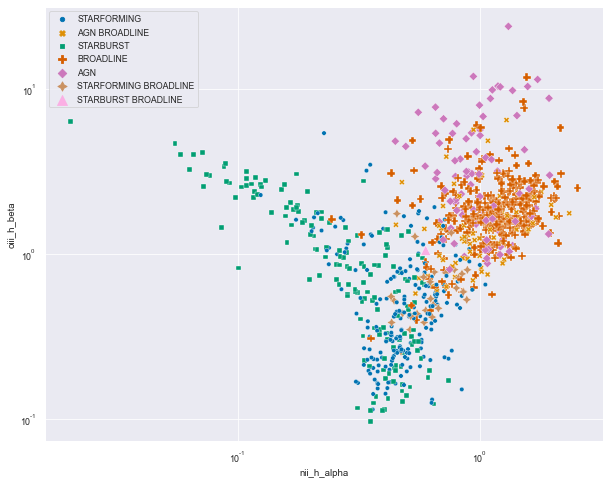

In [33]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(100, 20))

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()